In [1]:
from sklearn.cluster import KMeans
import numpy as np 
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("./Doctor_Strange_AIW_Profile.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

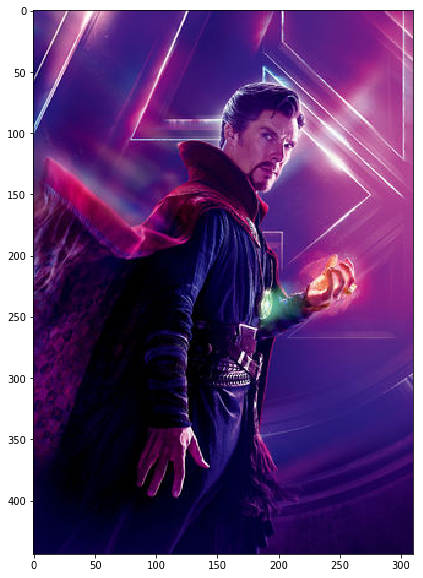

(444, 310, 3)


In [3]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()
print (img.shape)

In [4]:
o_img = img.copy()
c_img3 = img.copy()
c_img5 = img.copy()
c_img7 = img.copy()
c_img3 = np.reshape(c_img3, (-1,3))
c_img5 = np.reshape(c_img5, (-1,3))
c_img7 = np.reshape(c_img7, (-1,3))
print (c_img3.shape,c_img5.shape,c_img7.shape)


(137640, 3) (137640, 3) (137640, 3)


In [5]:
kmeans3 = KMeans(n_clusters=3,random_state=2)
kmeans5 = KMeans(n_clusters=5,random_state=2)
kmeans7 = KMeans(n_clusters=7,random_state=2)

In [6]:
kmeans3.fit_predict(c_img3)
kmeans5.fit_predict(c_img5)
kmeans7.fit_predict(c_img7)


array([2, 2, 2, ..., 5, 5, 5], dtype=int32)

In [7]:
centers3 = kmeans3.cluster_centers_.astype(int)
centers5 = kmeans5.cluster_centers_.astype(int)
centers7 = kmeans7.cluster_centers_.astype(int)


In [8]:
print (centers3,centers5,centers7)


[[ 79  28 118]
 [ 14   1  42]
 [177  97 159]] [[207 163 197]
 [ 42   5  76]
 [  5   0  29]
 [ 75  30 123]
 [155  62 139]] [[  3   0  27]
 [156  55 136]
 [ 58  24 117]
 [183 112 166]
 [ 99  37 126]
 [ 38   3  69]
 [225 197 219]]


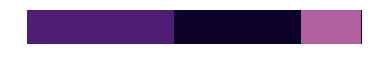

In [9]:
per = np.asarray(np.unique(kmeans3.labels_, return_counts=True)[1], dtype='float32')
per = per / c_img3.shape[0]
per

dom = [[per[ix], centers3[ix]] for ix in range(kmeans3.n_clusters)]
DOM = sorted(dom, key=lambda z: z[0], reverse=True)

plt.figure(0)
plt.axis('off')

patch = np.zeros((50, 500, 3)).astype(int)

start = 0
for cx in range(kmeans3.n_clusters):
    width = int(DOM[cx][0] * patch.shape[1])
    end = start + width
    patch[:, start:end, :] = DOM[cx][1]
    start = end

plt.imshow(patch)
plt.show()


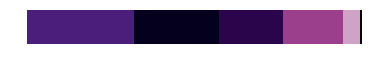

In [10]:
per = np.asarray(np.unique(kmeans5.labels_, return_counts=True)[1], dtype='float32')
per = per / c_img5.shape[0]
per

dom = [[per[ix], centers5[ix]] for ix in range(kmeans5.n_clusters)]
DOM = sorted(dom, key=lambda z: z[0], reverse=True)

plt.figure(0)
plt.axis('off')

patch = np.zeros((50, 500, 3)).astype(int)

start = 0
for cx in range(kmeans5.n_clusters):
    width = int(DOM[cx][0] * patch.shape[1])
    end = start + width
    patch[:, start:end, :] = DOM[cx][1]
    start = end

plt.imshow(patch)
plt.show()


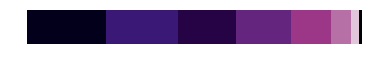

In [11]:
per = np.asarray(np.unique(kmeans7.labels_, return_counts=True)[1], dtype='float32')
per = per / c_img7.shape[0]
per

dom = [[per[ix], centers7[ix]] for ix in range(kmeans7.n_clusters)]
DOM = sorted(dom, key=lambda z: z[0], reverse=True)

plt.figure(0)
plt.axis('off')

patch = np.zeros((50, 500, 3)).astype(int)

start = 0
for cx in range(kmeans7.n_clusters):
    width = int(DOM[cx][0] * patch.shape[1])
    end = start + width
    patch[:, start:end, :] = DOM[cx][1]
    start = end

plt.imshow(patch)
plt.show()


In [12]:
for ix in range(c_img3.shape[0]):
    c_img3[ix] = centers3[kmeans3.labels_[ix]]
    
for ix in range(c_img5.shape[0]):
    c_img5[ix] = centers5[kmeans5.labels_[ix]]
    
for ix in range(c_img7.shape[0]):
    c_img7[ix] = centers7[kmeans7.labels_[ix]]

In [13]:
d_img3 = np.reshape(c_img3,(img.shape[0],img.shape[1],3))
d_img5 = np.reshape(c_img5,(img.shape[0],img.shape[1],3))
d_img7 = np.reshape(c_img7,(img.shape[0],img.shape[1],3))

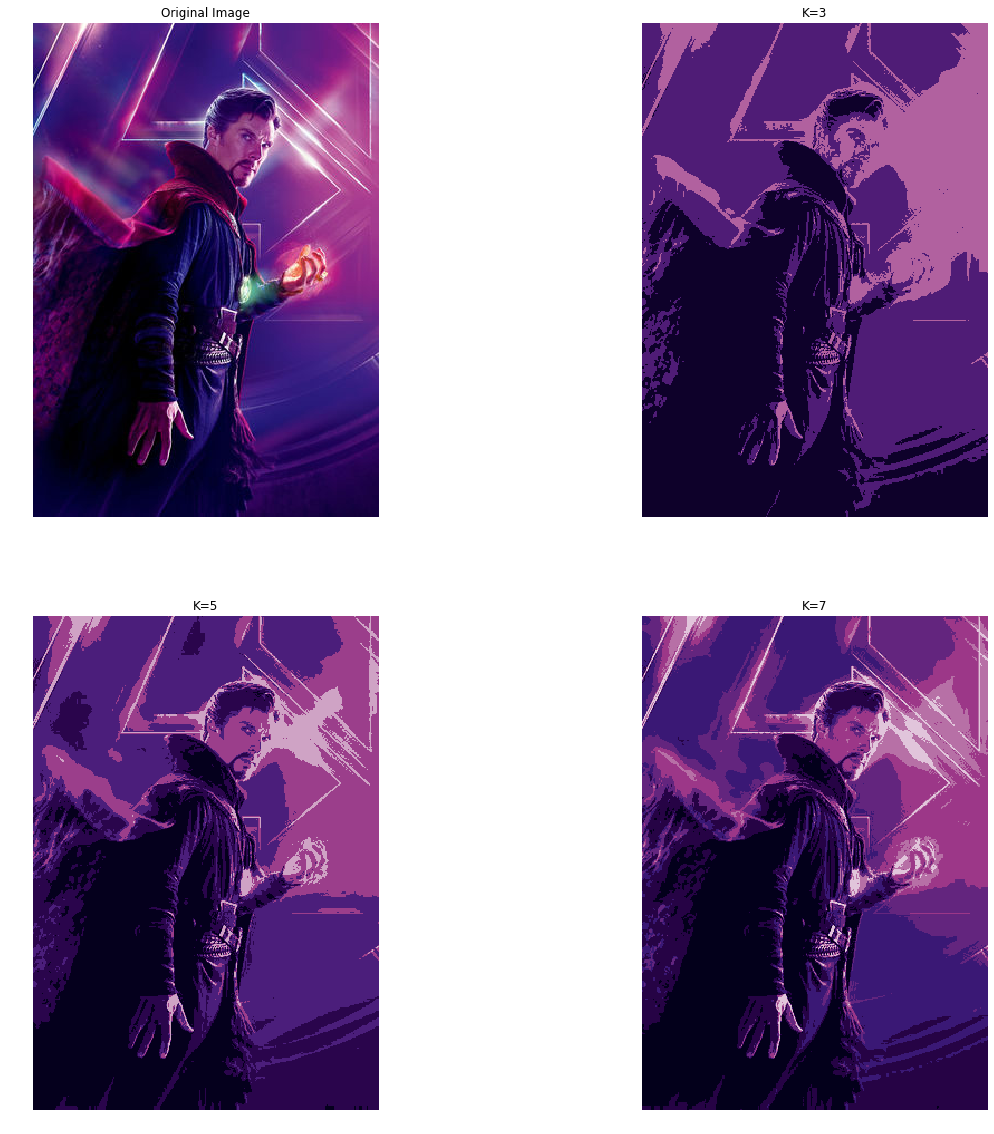

In [14]:
plt.figure(1,figsize=(20,20))


plt.subplot(2, 2, 1)
plt.axis("off")
plt.title("Original Image")
plt.imshow(o_img)

plt.subplot(2,2,2)
plt.axis("off")
plt.title("K=3")
plt.imshow(d_img3)

plt.subplot(2,2,3)
plt.axis("off")
plt.title("K=5")
plt.imshow(d_img5)

plt.subplot(2,2,4)
plt.axis("off")
plt.title("K=7")
plt.imshow(d_img7)

plt.show()
